# Lab 2 Goals

The goals of this lab are:

* To continue practicing making data visualizations.
* To familiarize yourself with Pearson's correlation coefficient $r$. 
* To practice writing functions. 
* To practice calculating linear regression estimates. 

For this lab, it may be helpful to install and load the following modules: 

* `plotnine`
* `numpy`
* `pandas` 

In [1]:
import plotnine as p9
import numpy as np
import pandas as pd

We will be continuing to use the dataset scraped from the website Epicurious. Let's use the version that we cleaned last week--you can rerun the code below.

In [5]:
epicurious = pd.read_csv("epi_r.csv")[['title', 'rating', 'calories', 'protein', 'fat', 'sodium']].dropna()

maxcal = epicurious['calories'].nlargest(n=10).index
maxpro = epicurious['protein'].nlargest(n=10).index
maxfat = epicurious['fat'].nlargest(n=10).index
maxsod = epicurious['sodium'].nlargest(n=10).index

maxvals = set().union(maxcal, maxpro, maxfat, maxsod)

epicurious = epicurious.drop(labels = maxvals, axis=0).drop_duplicates()

In addition, we will also be using the following datasets:

* `mtcars`
* `gasprice`
* `eagles`

Download the .csv files and load them into your workspace.

In [6]:
mtcars = pd.read_csv("mtcars.csv")
gasprice = pd.read_csv("gasprice.csv")
eagles = pd.read_csv("eagles.csv")

## Describing Relationships

### `mtcars`

The `mtcars` dataset includes [data on fuel consumption and other aspects of 32 cars from a 1974 issue of *Motor Trends* magazine](https://vincentarelbundock.github.io/Rdatasets/doc/datasets/mtcars.html). We are specifically interested in how the weight of the car (`wt`) might impact the car's displacement, which can be thought of as the size of the engine (`disp`).

1. Using `plotnine`, create a scatterplot displaying the relationship between weight and displacement. Remember that you should be supplying an `x` and a `y` aesthetic, and that $x$ is traditionally the explanatory variable and $y$ is traditionally the response.

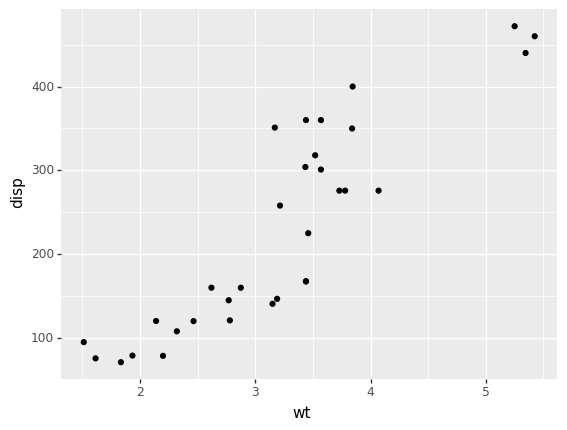

<ggplot: (372166572)>

In [7]:
(p9.ggplot(mtcars, p9.aes(x = 'wt', y = 'disp')) +
  p9.geom_point())

Note that `plotnine` has a tool for us to easily add the line of best fit to a plot--it is the function `geom_smooth()`. We need to specify that `geom_smooth` should be using linear regression, which we can do with the argument `method = "lm"`.  Recall that you add it directly to the other lines of code. See the example below (note that for the sake of clarity I have added an argument `se = False`, which we will talk about later). 

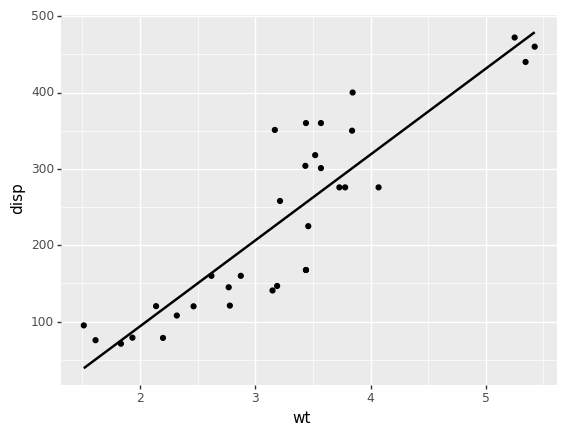

<ggplot: (372906460)>

In [8]:
(p9.ggplot(mtcars, p9.aes(x = 'wt', y = 'disp')) +
  p9.geom_point() + 
  p9.geom_smooth(method = "lm", se = False))

2. Describe this relationship in terms of its form, direction, strength, and unusual values. Is a linear relationship appropriate for describing `weight` and `displacement`? If not, what type of relationship might be more appropriate?

\textcolor{blue}{This is a positive, moderately strong relationship with a cluster of upper values in the upper righthand corner. This relationship *looks* linear, but if you investigate closely, you'll see that most of the points in the middle are below the graph, but the points at the beginning and the end are above the graph. This indicates that the graph is not linear, and is in fact curved (specifically, a quadratic). }

### `gasprice`

The `gasprice` dataset includes data on gas prices in the United States, collected once per week from 1990 to 2003 [documentation here](https://vincentarelbundock.github.io/Rdatasets/doc/quantreg/gasprice.html).

3. Create a scatterplot displaying the relationship between time (`time`) and gas price (`value`). Add the line of best fit to help you describe the plot. 

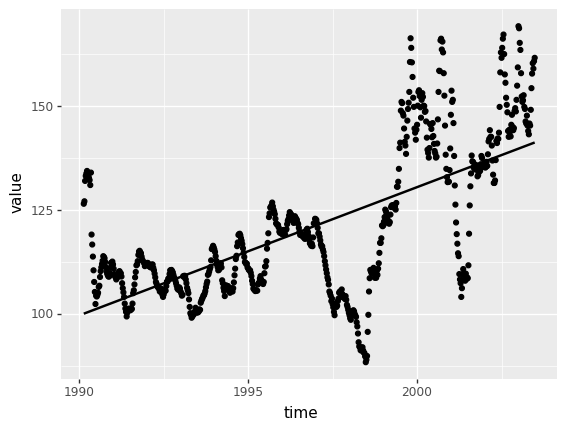

<ggplot: (373075749)>

In [9]:
(p9.ggplot(gasprice, p9.aes(x = 'time', y = 'value')) +
  p9.geom_point() + 
  p9.geom_smooth(method = "lm", se = False))

4. Describe this relationship in terms of its form, direction, strength, and unusual values. Is a linear relationship appropriate for describing `time` and `value`? If not, what type of relationship might be more appropriate?

\textcolor{blue}{This is a positive, strong relationship with very few unusual values. This relationship does not look linear, because it isn't! This is an example of a time series, which uses completely different methods. Linear regression should not be applied to this type of data. }

### `eagles`

The `eagles` dataset contains information the number of mating pairs of bald eagles in the United States. In 1967, bald eagles officially became an endangered species, and in 1972, the use of DDT (a pesticide causing damage to the shells of the eagle eggs) was banned--scientists have been tracking the population since (<https://courses.lumenlearning.com/wmopen-concepts-statistics/chapter/exponential-relationships-1-of-6/>).

5. Create a scatterplot displaying the relationship between time (`Year`) and the number of mating pairs (`Pairs`). Add the line of best fit to help you describe the plot. 


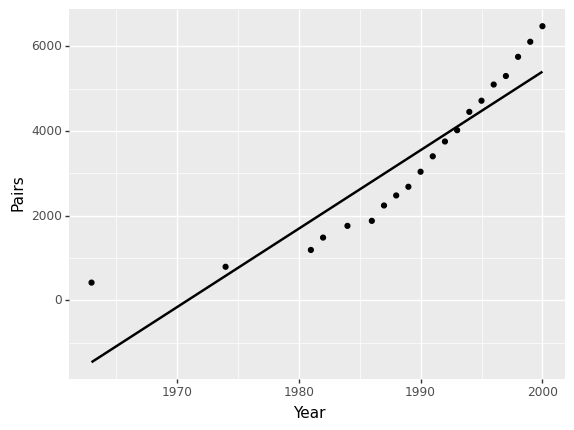

<ggplot: (372918911)>

In [10]:
(p9.ggplot(eagles, p9.aes(x = 'Year', y = 'Pairs')) +
  p9.geom_point() + 
  p9.geom_smooth(method = "lm", se = False))

6. Describe this relationship in terms of its form, direction, strength, and unusual values. Is a linear relationship appropriate for describing `Year` and `Pair`? If not, what type of relationship might be more appropriate?

\textcolor{blue}{This is once more a strong, positive relationship with maybe one unusual value on the lefthand side, but once again is not linear. It is also a curve--specifically, an example of exponential growth.}

7. Now confirm the value of the correlation between `Year` and `Pairs`--I used `.corr()`. Would you describe this as weak, moderate, or strong based on $r$? Is this consistent with your findings from the graph?

In [11]:
Year = eagles['Year']
Pairs = eagles['Pairs']

Year.corr(Pairs)

0.9139915660915338

\textcolor{blue}{The correlation between} `Year` \textcolor{blue}{and} `Pairs` \textcolor{blue}{is 0.914, which is very close to 1. we would therefore describe the relationship as very strong--this is somewhat consistent with the graph, although I would not have guessed it to be that high.}

As it turns out, the relationship between year and number of mating pairs is best described with an exponential relationship, not a straight line! However, we can see that the correlation is very strong--if we looked at $r$ alone, we might think that this data has a very strong linear relationship. This is why it is important to consider both the plot and the correlation at the same time!

### `epicurious`

8. For the remaining exercises, we will treat `fat` as an explanatory variable and `calories` as the response variable. Create a scatterplot displaying the relationship between `fat` and `calories`. Be sure to put the variables on the appropriate axes. 

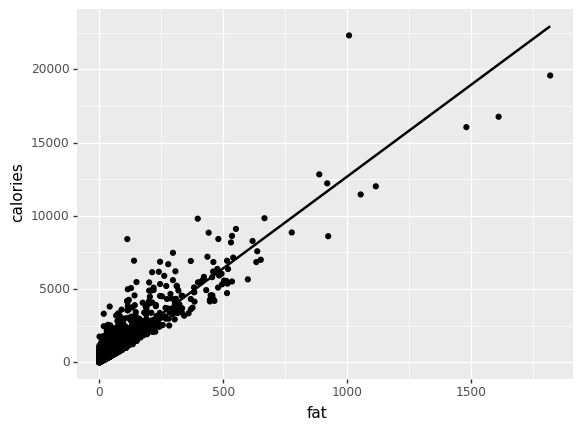

<ggplot: (372959720)>

In [12]:
(p9.ggplot(epicurious, p9.aes(x = 'fat', y = 'calories')) +
  p9.geom_point() + 
  p9.geom_smooth(method = "lm", se = False))

9. Describe this relationship in terms of its form, direction, strength, and unusual values. Is a linear relationship appropriate for describing `fat` and `calories`? If not, what type of relationship might be more appropriate?

\textcolor{blue}{The relationship is mostly linear. It is a positive, moderately strong relationship with a few extreme values, but the values do mostly follow the same pattern. }

10. Now, define series `fat` and `cal`....  calculate the correlation between `fat` and `calories`. 

In [13]:
fat = epicurious['fat']
calories = epicurious['calories']

fat.corr(calories)

0.9268116169598251

11. It turns out that there are 28.346 grams of fat in an ounce. Create a new list called `fat_oz` containing the amount fat in the recipe in ounces. Now, calculate the correlation between `fat_oz` and `calories`. What is the value of $r$? Is this what you expected?

In [14]:
fat_oz = fat/28.346

fat_oz.corr(calories)

0.9268116169598251

The answer should be identical. This is because correlation is *unitless*--it does not depend on the units of either of the variables. 

12. Now suppose we want to treat `calories` as the explanatory variable and `fat` as the explanatory variable. Calculate the correlation between `calories` and `fat`. Now what is the value of $r$? Is this what you expected?

In [15]:
fat.corr(calories)

0.9268116169598251

If you switch the places, nothing happens! The correlation of the two variables is the same no matter which is treated as the explanatory variable, $X$, and which is treated as the response variable, $Y$.

## Writing Functions

### Slope

Occasionally we want to perform calculations and repeat them over and over again--this is an excellent place to write a function. 

13. Using the equation 

$$b_1 = r \times \frac{s_y}{s_x},$$

write a function called `calc_slope` that will calculate the estimate of the slope, $b_1$, given the correlation between two variables, the standard deviation of the explanatory variable, and the standard deviation of the response. 

In [16]:
def calc_slope(r_xy, s_x, s_y):
    b1 = r_xy*s_y/s_x 
    return(b1)

14. Now, apply your function to the `epicurious` data--you may want to calculate the summary statistics for the dataset first (save the correlation as `r_fatcal` and the standard deviations as `s_fat` and `s_cal`). When predicting `calories` from `fat`, what is the estimate of the slope? What is the interpretation of the slope?

In [17]:
epicurious.describe()

,rating,calories,protein,fat,sodium
count,14422.000000,14422.000000,14422.000000,14422.000000,14422.000000
mean,3.763478,510.993829,22.308487,29.293579,704.100680
std,1.273085,709.563106,43.998361,52.445087,2617.968261
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,206.000000,3.000000,8.000000,90.000000
50%,4.375000,346.000000,9.000000,18.000000,306.000000
75%,4.375000,600.000000,28.000000,34.000000,733.000000
max,5.000000,22312.000000,1365.000000,1818.000000,116178.000000


In [18]:
r_fatcal = fat.corr(calories)
s_fat = epicurious['fat'].std()
s_cal = epicurious['calories'].std()

calc_slope(r_fatcal, s_fat, s_cal)

12.539426841855128

\textcolor{blue}{For every extra gram of fat, we should expect 12.54 additional calories.}

### Intercept

15. We also need to frequently calculate the intercept. Using the equation 

$$b_0 = \bar{y} - b_1\bar{x}$$

Write a function called `calc_int` that will calculate the estimate of the intercept, $b_0$, given the correlation between two variables, the standard deviations of both the explanatory and response variables, and the means of both the explanatory and response variables. Your new function should use the `calc_slope` function you just wrote.

In [19]:
def calc_int(r_xy, s_x, s_y, m_x, m_y):
    b1 = calc_slope(r_xy, s_x, s_y)
    b0 = m_y - b1*m_x
    return(b0)

16. Now apply your function to the `epicurious` data (save the means as `m_fat` and `m_cal`). When predicting `calories` from `fat`, what is the estimate of the intercept? What is the interpretation of the intercept?

In [20]:
m_fat = epicurious['fat'].mean()
m_cal = epicurious['calories'].mean()

calc_int(r_fatcal, s_fat, s_cal, m_fat, m_cal)

143.6691348819706

\textcolor{blue}{If a recipe has 0 grams of fat, we should expect it to have 143.67 calories.}

### Prediction

17. One of the linear regression tasks we are usually interested in is prediction. Write a function called `calc_predict` that can predict values of $y$ from $x$ given a column of data for the explanatory variable and a column of data for the response. Your new function should use both the `calc_slope` and `calc_int` functions. 

In [21]:
def calc_pred(x, y):
    r_xy = x.corr(y)
    
    m_x = x.mean()
    m_y = y.mean()
    
    sd_x = x.std()
    sd_y = y.std()
    
    b1 = calc_slope(r_xy, sd_x, sd_y)
    b0 = calc_int(r_xy, sd_x, sd_y, m_x, m_y)
    
    preds = b0 + b1*x
    
    return(preds)

18. Now, apply the function to the `epicurious` dataset and save a list of calorie predictions as `pred_cal`. 

In [22]:
pred_cal = calc_pred(fat, calories)

### Residuals

19. We will definitely need to repeatedly calculate the residuals. Write a function called `calc_res` that can calculate the residuals for the entire dataset, given a column of data for the explanatory variable, and a column of data for the response. Your new function should use at least one of the functions you have already written.

In [23]:
def calc_res(x, y):  
    preds = calc_pred(x, y)
    resids = y - preds
    return(resids)

20. Now, apply the function to the `epicurious` dataset and save a list of residuals as `res_cal`. 

In [24]:
pred_res = calc_res(fat, calories)

### Loss Function

21. Hopefully, you remember that the loss function for simple linear regression is the sum of the squared residuals (also known as the sum of squared errors, or SSE). Write a function called `calc_SSE` that returns a single value given a column of data for the explanatory variable, and a column of data for the response. Your function should refer to all of the functions you have previously written. 

In [25]:
def calc_SSE(x, y):  
    resids = calc_res(x, y)
    resids2 = resids**2

    return(resids2.sum())

## Optimization

We are lucky to have equations (more formally known as closed form estimators) to estimate the slope and the intercept. However, this is not always the case! Recall that the estimates are derived from minimizing the sum of the squared residuals--when we don't have closed form estimators (which happens frequently in more complicated models), we will have to use computers to minimize our loss function. Then, the estimates we are looking for are the values where the loss function is minimized.

Minimizing a loss function is a special case of *optimization*. To optimize, we will need the `scipy` module--install and load it now. From `scipy.optimize`, we specifically need `minimize`.  

In [26]:
import scipy
from scipy.optimize import minimize

The `minimize` method accepts many different arguments, but here's what we are specifically concerned about:

* `fun`, the objective function to be minimized.
* `x0`, an initial guess for the values we are looking for. 

You can read more about the other arguments, which may come into play with more complicated models, in the [scipy.optimize.minimize documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html). You will have to specify a method, for most problems, `method="BFGS"` will work.

In this case, the objective function is the loss function we happen to be using--in the case of linear regression, the SSE function. We can't just use the function as is, it has to have a special format. 

* The first argument needs contain the values that you are looking for, in this case, the slope and intercept. Other things you need can go next. 
* The function must return the loss function, in this case, the SSE. 

22. Adapt your `calc_SSE` function so that it follows these requirements. 

In [94]:
def calc_SSE(parms, x, y):  
    preds = parms[0] + parms[1]*x
    resids = y - preds
    resids2 = resids**2
    return(resids2.sum())

We can give any real values for the initial guesses, but we have to give at least two, one for the intercept and one for the slope. For now, we can just use zero for both--create an array, `init`, containing two zeroes to use as initial values. 

In [95]:
init = [0]*2
init

[0, 0]

Now, we can use these pieces with `minimize()`. 

In [107]:
minimize(calc_SSE, x0 = init, args = (fat, calories), method = "BFGS")

      fun: 1023903052.7768826
 hess_inv: array([[ 4.83715850e-05, -4.01914387e-07],
       [-4.01914387e-07,  1.29421364e-08]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 7
     njev: 20
   status: 0
  success: True
        x: array([143.66897636,  12.539428  ])

23. Confirm that these answers are the same as the estimates you calculated with the equations from lecture. 

## `statsmodels`

In addition to writing your own functions, either to directly estimate parameters or to minimize the loss function, there are a lot of pre-packaged methods in Python to use for linear regression. You may be familiar with `scikit-learn` already, but I want to introduce another module, `statsmodels`. Both modules work similarly, but `statsmodels` has some functionality that will help us out in future weeks. 

24. Install the `statsmodels` module, and load `statsmodels.api`. 

In [110]:
import statsmodels.api as sm

To fit a linear regression model with `statsmodels`, we first have to separately save our $X$ and $Y$ variables. Technically, we've already done that with `fat` and `calories`, but review the code below--it's good practice to get into this type of syntax. I've used `X1` since this is our first model. 

In [112]:
X1 = epicurious["fat"]
Y = epicurious["calories"]

Note that we've only saved one explanatory variable here, but you could save more than one to use with multiple linear regression. 

By saving `"fat"` inside `X1`, we're letting Python know that we want a slope for fat, but we also need to specify that we would like an intercept as well. We do that by using the following code:

In [113]:
X1 = sm.add_constant(X1)

Now, we can actually fit the model. We do this with the following line of code (again, I've saved an object called `model1` since this is the first model we are fitting. Also, the only model for this lab, but it's good practice to get into the habit of giving different models different names so you don't write over anything and lose track of what you were doing. 

In [114]:
model1 = sm.OLS(Y, X1).fit()

`statsmodels` knows that people using linear regression are generally going to be performing similar calculations, so there is a lot packed into `model1`. 

25. Apply the `dir()` function to `model1`, and see if you can identify any of the parts packed into the object. 

In [116]:
dir(model1)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'info_criteria',


26. As I mentioned, there is a lot! For now, we just want to use the `.summary()` method. Investigate the output below to see if you can locate where in the table the slope and intercept are located. 

In [118]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               calories   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                 8.783e+04
Date:                Fri, 24 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:12:56   Log-Likelihood:            -1.0101e+05
No. Observations:               14422   AIC:                         2.020e+05
Df Residuals:                   14420   BIC:                         2.020e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        143.6691      2.542     56.528      0.000     138.687     148.651
fat           12.5394      0.042    296.369      0.000      12.456      12.622
==============================================================================
Omnibus:                    20599.215   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         23533806.919
Skew:                           7.996   Prob(JB):                         0.00
Kurtosis:                     200.250   Cond. No.                         68.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

\textcolor{blue}{There are actually three separate tables here. You want to look at the middle table, in the "coef" column. The value in the "const" row is the intercept, and the value in the "fat" row is the slope for fat.}